In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#pip install IPython

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Getting our Workspace Ready

In [5]:
# import neccessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF Version:",tf.__version__)
print("TF Version_hub:",hub.__version__)

# Checking for gpu availability
print("GPU","available" if tf.config.list_physical_devices("GPU") else "not available")

TF Version: 2.15.0
TF Version_hub: 0.16.1
GPU available


#Loading data

In [6]:
df=pd.read_csv("/content/drive/MyDrive/Dog vision/labels.csv")

In [7]:
df.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

In [8]:
df.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [9]:
df['breed'].unique()

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

<Axes: xlabel='breed'>

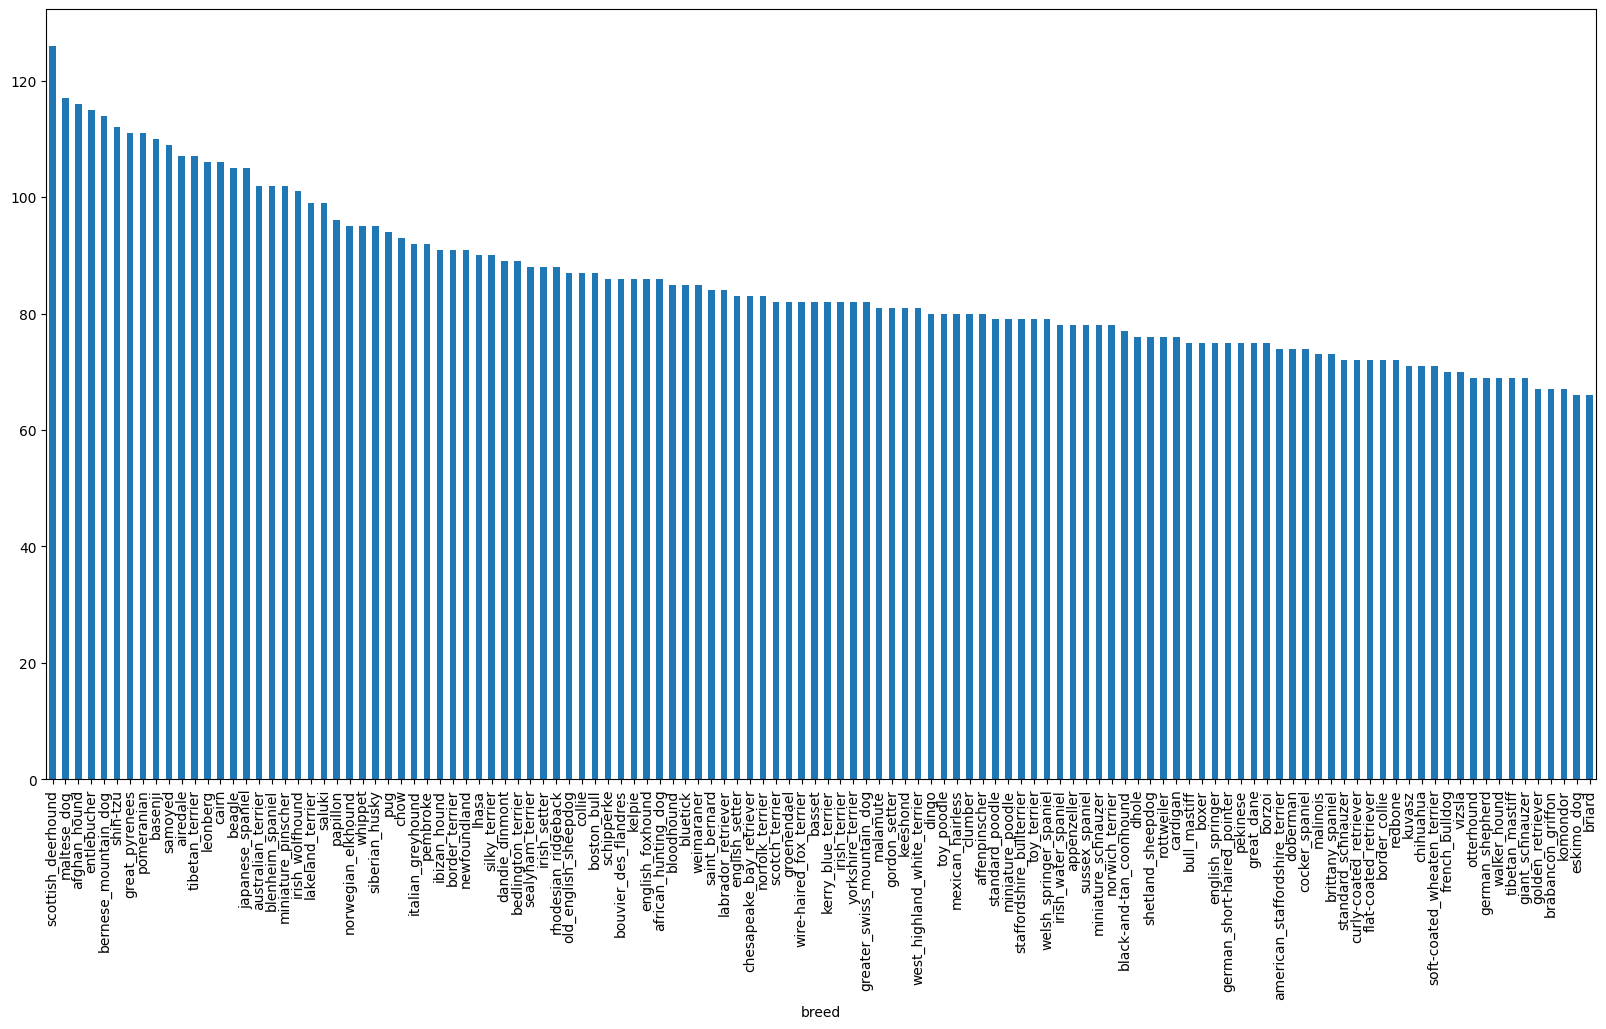

In [10]:
df['breed'].value_counts().plot.bar(figsize=(20,10))

In [11]:
df['breed'].value_counts().mean()

85.18333333333334

In [12]:
df['breed'].value_counts().median()

82.0

# Viewing an Image

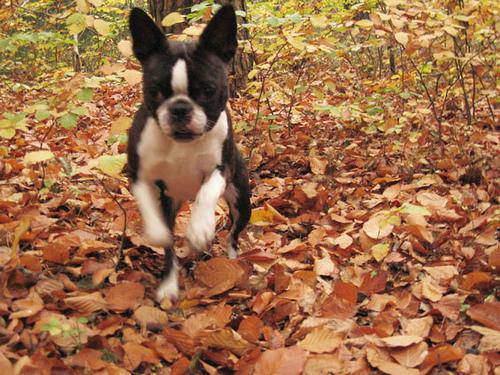

In [21]:
from IPython.display import Image
Image("/content/drive/MyDrive/Dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

# Creating Path Names and  Their Lables

In [13]:
#Create pathnames from Image Ids
filenames=["/content/drive/MyDrive/Dog vision/train/"+fname for fname in df['id']+".jpg"]

#checking the first names
filenames

['/content/drive/MyDrive/Dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 '/content/drive/MyDrive/Dog vision/train/004396df1acd0f1247b740ca2b14616e.jpg',
 '/content/drive/MyDrive/Dog vision/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 '/content/drive/MyDrive/Dog

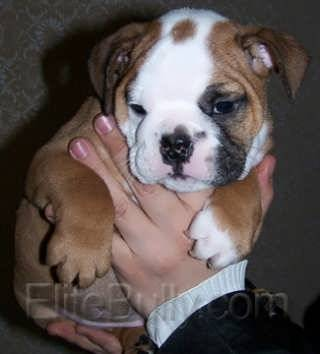

In [22]:
Image(filenames[6000])


In [15]:
df["breed"][6000]

'french_bulldog'

In [16]:
labels=df['breed']
labels=np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [17]:
len(labels)

10222

In [24]:
if len(labels)==len(filenames):
  print("There is match betwwwn number of labels and filenames")
else:
  print("There is mismatch between number of labels and filenames")

There is match betwwwn number of labels and filenames


In [25]:
#changing the labels into boolean values
print(labels[0])
labels[0]==df['breed'].unique()

boston_bull


array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [26]:
# Change every label into boolean

boolean_labels = [label==df['breed'].unique() for label in labels]
boolean_labels[:2]


[array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False,  True, False, False, False, Fal

In [27]:
len(boolean_labels)

10222

In [28]:
#turning labels into integers
print(labels[0])
#print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].astype(int))

boston_bull
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [29]:
filenames[:10]

['/content/drive/MyDrive/Dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

**Creating own validation set**

In [30]:
X = filenames
Y = boolean_labels

Now We are experimenting with 1000 images

In [31]:
#setting number of imgages to use

NUM_IMAGES= 1000 #@param{type:"slider",min:1000,max:10000}

In [32]:
#Splitting data into train and test data
from sklearn.model_selection import train_test_split

X_train,X_val,Y_train,Y_val=train_test_split(X[:NUM_IMAGES],Y[:NUM_IMAGES],test_size=0.2,random_state=42)

In [33]:
len(X_train),len(Y_train),len(X_val),len(Y_val)

(800, 800, 200, 200)

In [34]:
X_train[:5],Y_train[:5]

(['/content/drive/MyDrive/Dog vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/Dog vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/MyDrive/Dog vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/MyDrive/Dog vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/drive/MyDrive/Dog vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False,  True, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         Fals

# PreProcessing Images Into Tensors

In [35]:
#convert image to numpy array
from matplotlib.pyplot import imread
image=imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
]image

Image To Tensor

In [36]:
img_size=224
#creating Function for preprocessing Images
def process_image(image_path):
  #Read in an image file
  image=tf.io.read_file(image_path)
  #Turn the jpeg image into numerical tensor with 3 color channels (red,green,blue)
  image =tf.image.decode_jpeg(image,channels=3)
  #convert the color channel value from 0-255 to 0-1 values
  image=tf.image.convert_image_dtype(image,tf.float32)
  #resize the image
  image=tf.image.resize(image,size=[img_size,img_size])

  return image


# Turning Data Into Batches

In [37]:
def get_image_label(image_path,label):
  image=process_image(image_path)
  return image,label

In [38]:
(process_image(X[42]),tf.constant(Y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In this Step we turn our data into Tensors in the Form:(image,label), we make a function of all data (X,Y) into batches

In [39]:
BATCH_SIZE=32
#create a function to turn data into batches
def create_data_batches(X,Y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  if test_data:
    print("Creating test data batches")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch=data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  elif valid_data:
    print("creating Validation data branches")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                             tf.constant(Y)))
    data_batch=data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  else:
    print("creating training data barnches")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(Y)))
    data=data.shuffle(buffer_size=len(X))
    data=data.map(get_image_label)
    #turn training data into batches
    data_batch=data.batch(BATCH_SIZE)

    return data_batch



In [40]:
#creating training and validation data branches
train_data=create_data_batches(X_train,Y_train)
val_data=create_data_batches(X_val,Y_val, valid_data=True)

creating training data barnches
creating Validation data branches


In [41]:
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

# Visualising Data Batches

In [42]:
unique_breeds=df['breed'].unique()
unique_breeds

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

In [43]:
import matplotlib.pyplot as plt

def show_25_images(images,labels):
  plt.figure(figsize=(12,12))

  for i in range(25):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])

In [44]:
unique_breeds[Y[0].argmax()]

'boston_bull'

In [45]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [46]:
train_images,train_labels=next(train_data.as_numpy_iterator())
train_images,train_labels

(array([[[[0.13837919, 0.17317928, 0.10750067],
          [0.17388503, 0.20917916, 0.13505997],
          [0.20048475, 0.23851708, 0.1479495 ],
          ...,
          [0.6190572 , 0.6781958 , 0.50893813],
          [0.5373704 , 0.5336413 , 0.4117811 ],
          [0.41364697, 0.39502722, 0.28031364]],
 
         [[0.16151087, 0.19292118, 0.13698629],
          [0.18954013, 0.2242483 , 0.15864956],
          [0.20759806, 0.2428971 , 0.16824996],
          ...,
          [0.4941332 , 0.55682194, 0.37984365],
          [0.59440833, 0.59770674, 0.46450523],
          [0.37081844, 0.3634246 , 0.23748507]],
 
         [[0.16817063, 0.1995432 , 0.14856279],
          [0.22391349, 0.25528604, 0.19646251],
          [0.27352178, 0.3088159 , 0.24151897],
          ...,
          [0.5193158 , 0.5820609 , 0.39993557],
          [0.57914066, 0.607393  , 0.44401664],
          [0.5123824 , 0.53278685, 0.3751275 ]],
 
         ...,
 
         [[0.36466375, 0.36074218, 0.34113434],
          [0.39652

In [47]:
len(train_images),len(train_labels)

(32, 32)

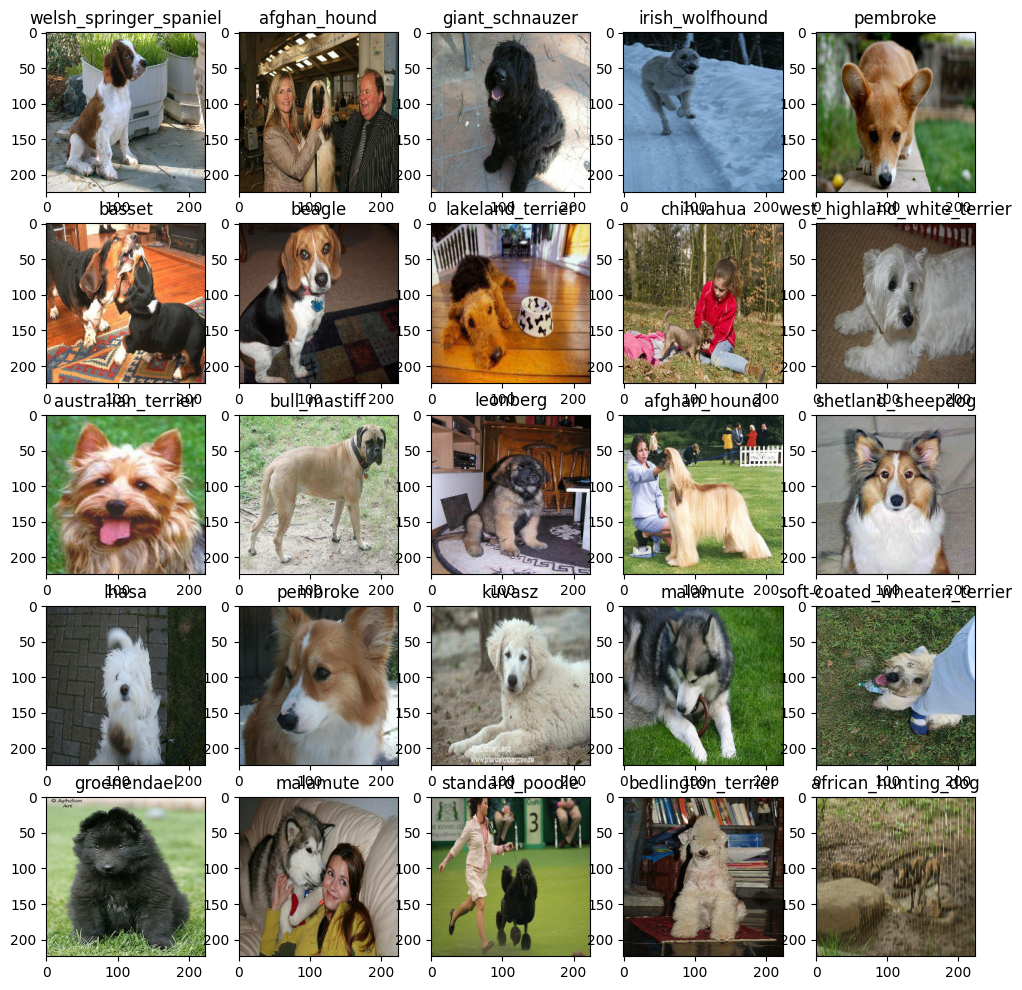

In [83]:
train_images,train_labels=next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

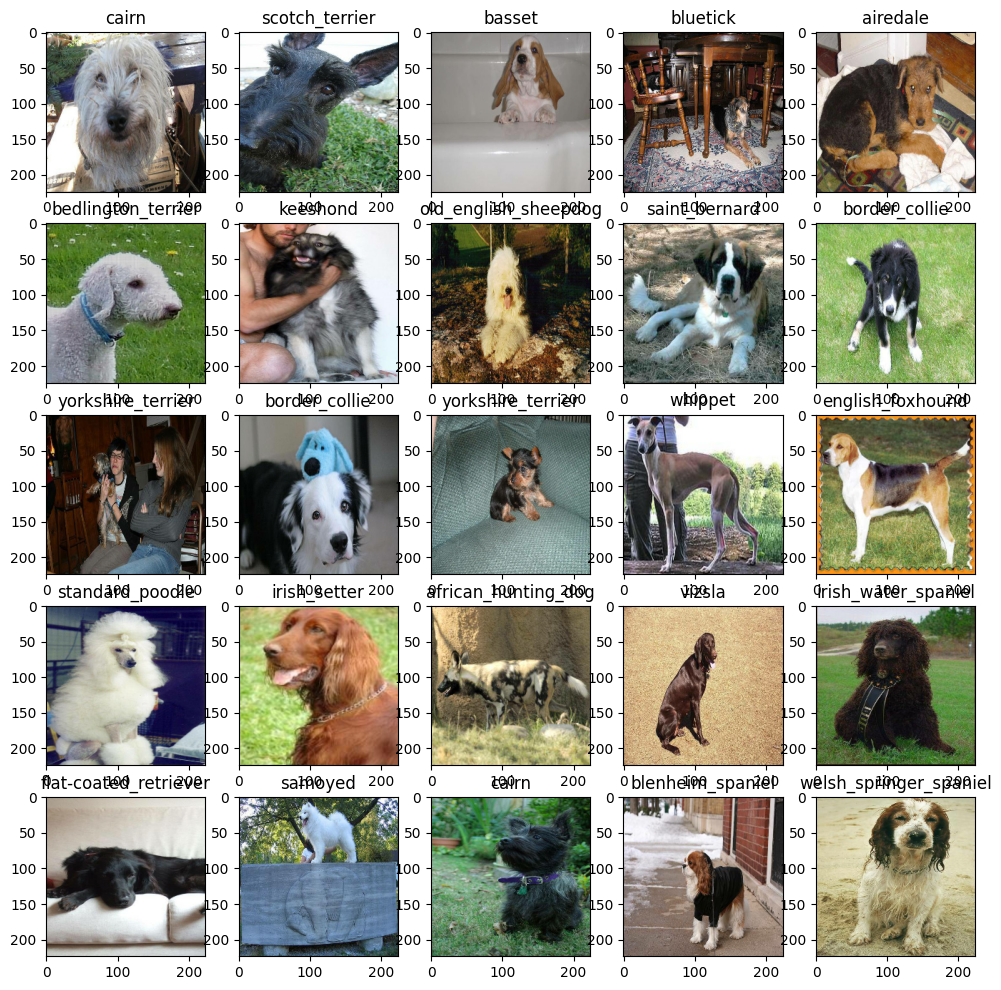

In [84]:
val_images,val_labels=next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

#Inputs and Outputs

In [85]:
img_size

224

In [86]:
input_shape=[None,img_size,img_size,3]
output_shape=len(unique_breeds)
#setup model url from tensorflow hub
model_url="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [87]:
#create a model which builds keras model
def create_model(input_shape=input_shape,output_shape=output_shape,model_url=model_url):
  print("Building model with:",model_url)

  #setup model layers
  model=tf.keras.Sequential([hub.KerasLayer(model_url),
                             tf.keras.layers.Dense(units=output_shape,activation='softmax')
                             ])
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )
  #build the model
  model.build(input_shape)
  return model

In [ ]:
model=create_model()
model.summary()

# Creating callbacks


In [88]:
#load Tensorboard notebook extension
%load_ext tensorboard


In [89]:
import datetime
import os
def create_tensorboard_callback():
  logdir=os.path.join("/content/drive/MyDrive/Dog vision/logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

  return tf.keras.callbacks.TensorBoard(logdir)

## Early stopping callback

In [90]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)


## Training a model(on subset of data)

In [91]:
No_of_epochs=100 #@param{type:'slider',min:10,max:100}

In [92]:
#GPU Verification
print("Gpu available" if tf.config.list_physical_devices("GPU") else "not available")

Gpu available


## creating a function to train the model

In [93]:
def train_model():
  #create a model
  model=create_model()
  #create a new tensorboard session every time
  tensorboard=create_tensorboard_callback()
  #fit the model to the passing it to callbacks we created
  model.fit(x=train_data,
            epochs=No_of_epochs,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping])
  return model

In [ ]:
model=train_model()

In [ ]:
# #checking the tensorboard logs

# %tensorboard --logdir /content/drive/MyDrive/Dog\ vision/logs

## Evaluations and Predictions

In [94]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
predictions=model.predict(val_data,verbose=1)
predictions

In [ ]:
predictions.shape

In [ ]:
len(Y_val)

In [ ]:
predictions[0]

In [ ]:
np.sum(predictions[0])

In [ ]:
index=0
print(predictions[index])
print(f"Max value:{np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max Index: {np.argmax(predictions[index])}")
print(f"Predicted Label:{unique_breeds[np.argmax(predictions[index])]}")

In [ ]:
unique_breeds[85]

In [ ]:
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]

pred_label=get_pred_label(predictions[15])
pred_label


In [ ]:
val_data

Unbatching the data set

In [ ]:
def unbatchify(data):
  images=[]
  labels=[]
  for image,label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images,labels
  #unbatchify the validation data
val_images,val_labels=unbatchify(val_data)
val_images[0],val_labels[0]


In [ ]:
get_pred_label(val_labels[0])

In [ ]:
get_pred_label(predictions[0])

In [ ]:
def plot_pred(prediction_probabilities,labels,images,n=1):
  pred_prob,true_label,image=prediction_probabilities[n],labels[n],images[n]

  predlabel=get_pred_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  #change color for predicted and true_label
  if predlabel == true_label:
    color="green"
  else:
    color="red"
  #plot title
  plt.title('{} {:2.0f}% {}'.format(predlabel,np.max(pred_prob)*100,true_label),color=color )

In [ ]:
plot_pred(prediction_probabilities=predictions,labels=val_labels,images=val_images,n=77)

In [ ]:
def plot_pred_conf(prediction_probabilities,labels,n=1):
  pred_prob,true_label=prediction_probabilities[n],labels[n]
  pred_label=get_pred_label(pred_prob)
  top_10_pred_indexes=pred_prob.argsort()[-10:][::-1]
  top_10_pred_values=pred_prob[top_10_pred_indexes]
  top_10_pred_labels=unique_breeds[top_10_pred_indexes]

  top_plot=plt.bar(np.arange(len(top_10_pred_labels)),top_10_pred_values,color='grey')

  plt.xticks(np.arange(len(top_10_pred_labels)),
            labels=top_10_pred_labels,
            rotation='vertical')
  if np.isin(true_label,top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels==true_label)].set_color("green")
  else:
    pass

In [ ]:
predictions[0][predictions[0].argsort()[-10:][::-1]]

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,labels=val_labels,n=9)

In [ ]:
i_multiplier=0
num_rows=3
num_cols=2
num_images=num_rows*num_cols
plt.figure(figsize=(10*num_cols,5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
  plt.tight_layout(h_pad=1.0)
  plt.show()

## Saving And Reloading Model

In [ ]:
def save_model(model,suffix=None):
  modeldir=os.path.join("/content/drive/MyDrive/Dog vision/models",
                    datetime.datetime.now().strftime("%y%m%d-%H%M%S"))
  model_path=modeldir + "_" + suffix + ".h5"
  print(f"Saving model to:{model_path}...")
  model.save(model_path)
  return model_path

In [60]:
def load_model(model_path):
  model=tf.keras.models.load_model(model_path,
                                   custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
save_model(model,suffix="1000-images-mobilenetv2-Adam")

In [ ]:
#Loading a trained model

loaded_1000_image_model=load_model("/content/drive/MyDrive/Dog vision/models/240502-203440_1000-images-mobilenetv2-Adam.h5")

In [ ]:
#Evaluate the pre-saved model
model.evaluate(val_data)

In [ ]:
loaded_1000_image_model.evaluate(val_data)

#Training model on Full Dataset


In [ ]:
len(X),len (Y)

In [ ]:
full_data=create_data_batches(X,Y)

In [ ]:
full_model=create_model()

In [ ]:
full_model_tensorboard=create_tensorboard_callback()

full_model_early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=3)

In [ ]:
full_model.fit(x=full_data,
               epochs=No_of_epochs,
               callbacks=[full_model_tensorboard,full_model_early_stopping])

In [ ]:
save_model(full_model,suffix="10000-images-mobilenetv2-Adam")

In [64]:
import os

test_path="/content/drive/MyDrive/Dog vision/test/"
test_filenames=[test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/drive/MyDrive/Dog vision/test/ac95c8129aa1dd41f127d9d718154750.jpg',
 '/content/drive/MyDrive/Dog vision/test/a9d91057710b8c85fc93a06c24722794.jpg',
 '/content/drive/MyDrive/Dog vision/test/aa280acd6d46dbe9720fec7e9e46579c.jpg',
 '/content/drive/MyDrive/Dog vision/test/ab558eaa2deb5a3307caf26e8e5eb779.jpg',
 '/content/drive/MyDrive/Dog vision/test/ac2c22af940590c0458297e86839ce51.jpg',
 '/content/drive/MyDrive/Dog vision/test/ab4e9c5d537ac45ce3937ed326c3d8ec.jpg',
 '/content/drive/MyDrive/Dog vision/test/aaa5a5f229ff556de918600cc664a55d.jpg',
 '/content/drive/MyDrive/Dog vision/test/abf74eb036cbebc70b0676aa588d0288.jpg',
 '/content/drive/MyDrive/Dog vision/test/ab065f522488afe09494c124342957bd.jpg',
 '/content/drive/MyDrive/Dog vision/test/aaf821f3cc836628c747072f4ab02cac.jpg']

In [65]:
len(test_filenames)

7979

In [66]:
test_data=create_data_batches(test_filenames,test_data=True)

Creating test data batches


In [67]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [68]:
#Loading a trained model

loaded_full_model=load_model("/content/drive/MyDrive/Dog vision/models/loaded_full_model.h5")

In [69]:
test_predictions=loaded_full_model.predict(test_data,verbose=1)

250/250 [==============================] - 226s 876ms/step


In [70]:
test_predictions.shape

(7979, 120)

In [71]:
np.savetxt("/content/drive/MyDrive/Dog vision/preds_array.csv",test_predictions,)

In [72]:
test_predictions=np.loadtxt("/content/drive/MyDrive/Dog vision/preds_array.csv")

In [73]:
preds_df=pd.DataFrame(columns=['id']+list(unique_breeds))

preds_df.head()

Empty DataFrame
Columns: [id, boston_bull, dingo, pekinese, bluetick, golden_retriever, bedlington_terrier, borzoi, basenji, scottish_deerhound, shetland_sheepdog, walker_hound, maltese_dog, norfolk_terrier, african_hunting_dog, wire-haired_fox_terrier, redbone, lakeland_terrier, boxer, doberman, otterhound, standard_schnauzer, irish_water_spaniel, black-and-tan_coonhound, cairn, affenpinscher, labrador_retriever, ibizan_hound, english_setter, weimaraner, giant_schnauzer, groenendael, dhole, toy_poodle, border_terrier, tibetan_terrier, norwegian_elkhound, shih-tzu, irish_terrier, kuvasz, german_shepherd, greater_swiss_mountain_dog, basset, australian_terrier, schipperke, rhodesian_ridgeback, irish_setter, appenzeller, bloodhound, samoyed, miniature_schnauzer, brittany_spaniel, kelpie, papillon, border_collie, entlebucher, collie, malamute, welsh_springer_spaniel, chihuahua, saluki, pug, malinois, komondor, airedale, leonberg, mexican_hairless, bull_mastiff, bernese_mountain_dog, american_staffordshire_terrier, lhasa, cardigan, italian_greyhound, clumber, scotch_terrier, afghan_hound, old_english_sheepdog, saint_bernard, miniature_pinscher, eskimo_dog, irish_wolfhound, brabancon_griffon, toy_terrier, chow, flat-coated_retriever, norwich_terrier, soft-coated_wheaten_terrier, staffordshire_bullterrier, english_foxhound, gordon_setter, siberian_husky, newfoundland, briard, chesapeake_bay_retriever, dandie_dinmont, great_pyrenees, beagle, vizsla, west_highland_white_terrier, kerry_blue_terrier, ...]
Index: []

[0 rows x 121 columns]

In [76]:
test_ids=[os.path.splitext(path) for path in os.listdir(test_path)]

In [78]:
os.path.splitext(test_filenames[0])

('/content/drive/MyDrive/Dog vision/test/ac95c8129aa1dd41f127d9d718154750',
 '.jpg')

In [79]:
test_ids=[os.path.splitext(path) for path in os.listdir(test_path)]
preds_df['id']=test_ids

In [80]:
preds_df.head()

id boston_bull dingo pekinese  \
0  (ac95c8129aa1dd41f127d9d718154750, .jpg)         NaN   NaN      NaN   
1  (a9d91057710b8c85fc93a06c24722794, .jpg)         NaN   NaN      NaN   
2  (aa280acd6d46dbe9720fec7e9e46579c, .jpg)         NaN   NaN      NaN   
3  (ab558eaa2deb5a3307caf26e8e5eb779, .jpg)         NaN   NaN      NaN   
4  (ac2c22af940590c0458297e86839ce51, .jpg)         NaN   NaN      NaN   

  bluetick golden_retriever bedlington_terrier borzoi basenji  \
0      NaN              NaN                NaN    NaN     NaN   
1      NaN              NaN                NaN    NaN     NaN   
2      NaN              NaN                NaN    NaN     NaN   
3      NaN              NaN                NaN    NaN     NaN   
4      NaN              NaN                NaN    NaN     NaN   

  scottish_deerhound  ... blenheim_spaniel silky_terrier sussex_spaniel  \
0                NaN  ...              NaN           NaN            NaN   
1                NaN  ...              NaN           NaN            NaN   
2                NaN  ...              NaN           NaN            NaN   
3                NaN  ...              NaN           NaN            NaN   
4                NaN  ...              NaN           NaN            NaN   

  german_short-haired_pointer french_bulldog bouvier_des_flandres  \
0                         NaN            NaN                  NaN   
1                         NaN            NaN                  NaN   
2                         NaN            NaN                  NaN   
3                         NaN            NaN                  NaN   
4                         NaN            NaN                  NaN   

  tibetan_mastiff english_springer cocker_spaniel rottweiler  
0             NaN              NaN            NaN        NaN  
1             NaN              NaN            NaN        NaN  
2             NaN              NaN            NaN        NaN  
3             NaN              NaN            NaN        NaN  
4             NaN              NaN            NaN        NaN  

[5 rows x 121 columns]

In [81]:
preds_df[list(unique_breeds)]=test_predictions
preds_df.head()

id   boston_bull         dingo  \
0  (ac95c8129aa1dd41f127d9d718154750, .jpg)  4.958451e-11  1.128919e-10   
1  (a9d91057710b8c85fc93a06c24722794, .jpg)  2.831205e-10  6.481723e-13   
2  (aa280acd6d46dbe9720fec7e9e46579c, .jpg)  2.793526e-10  1.645787e-11   
3  (ab558eaa2deb5a3307caf26e8e5eb779, .jpg)  5.192462e-12  1.896325e-09   
4  (ac2c22af940590c0458297e86839ce51, .jpg)  4.670689e-11  1.070276e-11   

       pekinese      bluetick  golden_retriever  bedlington_terrier  \
0  5.522001e-11  2.674892e-08      2.495444e-06        1.348776e-09   
1  1.191553e-11  6.885925e-06      1.654476e-11        1.735925e-10   
2  3.744552e-04  5.295630e-11      7.949235e-09        3.985581e-11   
3  7.077899e-11  2.532289e-08      9.787240e-11        3.839415e-09   
4  3.110296e-13  1.927978e-12      5.543928e-14        4.818785e-12   

         borzoi       basenji  scottish_deerhound  ...  blenheim_spaniel  \
0  2.665582e-12  7.969405e-10        3.678495e-11  ...      3.931985e-11   
1  3.068432e-16  3.946981e-14        2.483303e-10  ...      1.974386e-14   
2  6.464186e-09  6.795610e-12        9.353246e-08  ...      1.325475e-08   
3  1.080475e-09  8.094820e-10        2.079684e-09  ...      3.065690e-11   
4  6.530371e-15  3.261118e-09        4.802608e-12  ...      3.579072e-15   

   silky_terrier  sussex_spaniel  german_short-haired_pointer  french_bulldog  \
0   4.312891e-12    9.067613e-09                 7.492881e-07    5.273396e-06   
1   6.298505e-11    1.917811e-09                 9.999782e-01    1.873787e-11   
2   2.140842e-13    2.203764e-02                 1.021983e-10    1.690057e-10   
3   4.471386e-12    8.347410e-11                 4.709524e-10    1.022627e-11   
4   1.305143e-12    2.358603e-15                 7.961162e-14    1.263019e-14   

   bouvier_des_flandres  tibetan_mastiff  english_springer  cocker_spaniel  \
0          1.376427e-13     2.180104e-12      7.744233e-13    5.133918e-07   
1          3.029063e-10     1.817848e-11      9.710672e-10    1.479995e-13   
2          8.615608e-05     6.692968e-02      1.133295e-06    9.356368e-08   
3          5.463824e-13     3.227482e-08      2.248028e-12    2.037577e-10   
4          2.394477e-14     5.856574e-13      2.422062e-16    4.634122e-14   

     rottweiler  
0  9.225705e-09  
1  3.741571e-10  
2  7.091724e-09  
3  1.637434e-12  
4  3.088362e-07  

[5 rows x 121 columns]

In [95]:
preds_df.to_csv("/content/drive/MyDrive/Dog vision/full_model_predictions_submission_mobilenetV2.csv",index=False)

##Testing with custom Images

In [100]:
custom_path = "/content/drive/MyDrive/Dog vision/test_photos/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [101]:
custom_data = create_data_batches(custom_image_paths, test_data=True)

Creating test data batches


In [102]:
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 1s 815ms/step


In [103]:
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

NameError: name 'custom_pred_labels' is not defined

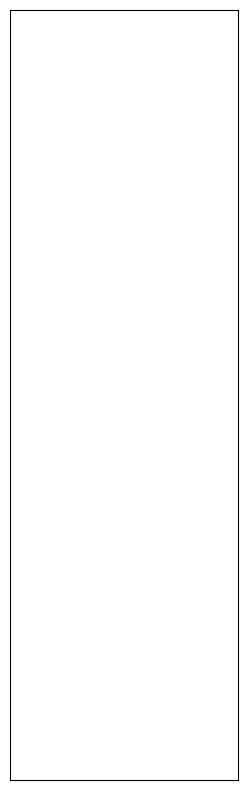

In [104]:
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)